In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import time
import datetime
import random
import io
import folium
from scipy.spatial import distance_matrix

In [65]:
df = pd.read_csv('data.csv')
df.head()

,City,Lattitude,Longitude
0,Islamabad,33.6989,73.0369
1,Lahore,31.5497,74.3436
2,Karachi,24.8600,67.0100
3,Peshawar,34.0000,71.5000
4,Hyderabad,25.3792,68.3683


In [66]:
#HERE I CALCULATE THE  min/max lang/lat values
values =(df.Longitude.min(), df.Lattitude.min(), df.Longitude.max(), df.Lattitude.max())
values


(67.01, 24.86, 74.3436, 34.0)

In [67]:
#HERE I USED FOLIUM TO CREATE A MAP WHICH PLACES THE VALUES IN THE DATASET ON THE MAP
map = folium.Map(location=[df.Lattitude.mean(), df.Longitude.mean()], zoom_start=12,control_scale=True)
#folium place markers
for lat, lng, label in zip(df.Lattitude, df.Longitude, df.City):
    folium.Marker(location=[lat, lng], popup=label, marker_color='red').add_to(map)
map


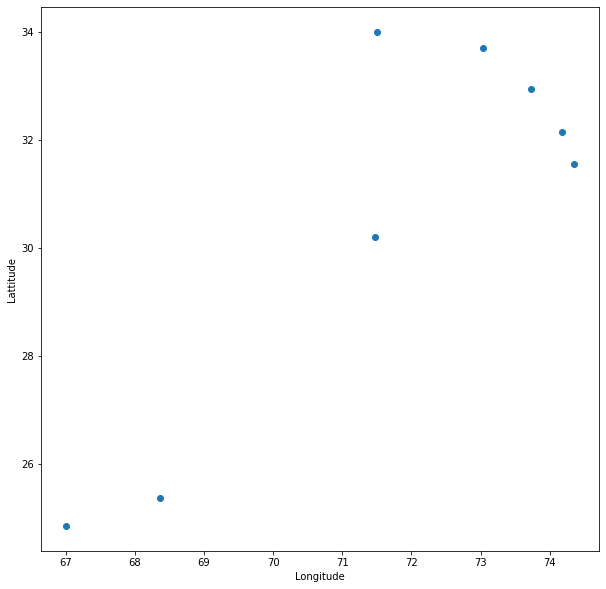

In [68]:
#THIS IS A BASIC PLOT OF THE POints
#plot the lang and lat
plt.figure(figsize=(10,10))
plt.scatter(df.Longitude, df.Lattitude)
plt.xlabel('Longitude')
plt.ylabel('Lattitude')
plt.show()





In [69]:
#calculate distance between each langitute and lattitude point
#calculate distance between each points and save in array
counter = 0
distances = []
cities =[]
for i in range(len(df)):
    cities.append(df.City[i])
print(cities)
data = []
for i in range(len(df)):
    l2 = [df.iloc[i].Longitude, df.iloc[i].Lattitude]
    #print(l2)
    data.append(l2)
print(data)
df = pd.DataFrame(data, columns=['xcord', 'ycord'], index=cities)
dist_m = pd.DataFrame(distance_matrix(df.values, df.values), index=df.index, columns=df.index)
dist_m.to_csv('dist_m.csv')









['Islamabad', 'Lahore', 'Karachi', 'Peshawar', 'Hyderabad', 'Jehlum', 'Multan', 'Gujranwala']
[[73.0369, 33.6989], [74.3436, 31.5497], [67.01, 24.86], [71.5, 34.0], [68.3683, 25.3792], [73.7276, 32.9405], [71.4711, 30.1978], [74.1833, 32.15]]


,Islamabad,Lahore,Karachi,Peshawar,Hyderabad,Jehlum,Multan,Gujranwala
Islamabad,0.000000,2.515259,10.698116,1.566117,9.540086,1.025786,3.835288,1.926999
Lahore,2.515259,0.000000,9.926418,3.753669,8.589487,1.521112,3.174727,0.621334
Karachi,10.698116,9.926418,0.000000,10.183305,1.454148,10.508122,6.956545,10.227430
Peshawar,1.566117,3.753669,10.183305,0.000000,9.172008,2.466727,3.802310,3.259233
Hyderabad,9.540086,8.589487,1.454148,9.172008,0.000000,9.267975,5.731167,8.925131
Jehlum,1.025786,1.521112,10.508122,2.466727,9.267975,0.000000,3.551647,0.912443
Multan,3.835288,3.174727,6.956545,3.802310,5.731167,3.551647,0.000000,3.341723
Gujranwala,1.926999,0.621334,10.227430,3.259233,8.925131,0.912443,3.341723,0.000000
